<a href="https://colab.research.google.com/github/ruo-han-gao/Neuro/blob/main/Neuroimaging_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neuroimaging Tools

Clara Weber // webercl@ cbs.mpg.de  
02 July 2025

In this notebook, I aim to provide a walk-through, interactive resource to introduce you to the neuroimaging tools that we (CNG lab) commonly use. If you want to get started using your own code, please familiarize yourself with your local environment and how to set up a conda environment (linked in our Lab wiki on GitHub). For easier use, I here use a google colab notebook, but encourage you to set up notebooks e.g. in VSCodium. Also, if you have time, read into version control and GitHub.



> PLEASE DO NOT EDIT THIS NOTEBOOK DIRECTLY. MAKE A COPY IN YOUR LOCAL DRIVE BEFORE RUNNING ANY CODE.  
>
You can do so by selecting File >> Save a Copy.  
If you are a CNG lab member, please coordinate your contribution to this tutorial with the author(s). Thank you!


## Getting started - or 'Housekeeping'
First, you want to mention what your script is for, what it does, and leave your name and date in docstrings.   This is usually for python scripts not notebooks, but anyways :)

In [ ]:
"""
Introduction notebook to Neuroimaging coding
(Interactive walk-through)

author: Clara Weber
date: 02-07-2025
"""

'\nIntroduction notebook to Neuroimaging coding\n(Interactive walk-through)\n\nauthor: Clara Weber\ndate: 02-07-2025\n'

Below I will install all necessary packages. On your workstation, you will want to do this inna conda environment so you so not need to install these every time.  There is a great tutorial on how to set up conda in our GitHub wiki.


In [ ]:
!pip install numpy
!pip install pandas
!pip install nibabel
!pip install nilearn
!pip install brainspace
!pip install brainstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.6/757.6 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.9/948.9 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.8/688.8 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 712.4/712.4 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.6/214.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Now import all packages you will need

In [ ]:
import numpy as np
import pandas as pd
import nibabel as nib
import os

## Very basic python intro
Please use the following lines to familiarize yourself with some basics. You are very encouraged to play around a bit, create a new cell and try something new!

In [ ]:
# everything behind a hashtag is a comment and will not be compiled
# This is a comment, and i can write everything I want here :)
# Flooble glooble

First, we want to define a variable. A variable is like an envelope in which you can store all kinds of things, e.g. numbers (integers, floats) or words (strings). You can show /print them using `print()`

In [ ]:
# Define a variable
var = 8
another_var = 'rabbit'

# show content of variable
print(var, another_var)

8 rabbit


`print()` is a function. You can recognize functions as they have parentheses after them. You can also define your own functions. They need input arguments (in the parentheses in the definition) and return the value calculated in the function.

In [ ]:
def my_own_function(in_number):
  """
  in these docstrings you explain what the function does, and specify input and output
  Adds 3 to input number

  Input: a float
  Returns: that float + 3
  """
  out_number = in_number + 3
  return out_number

In [ ]:
my_own_function(var)

11

--> what would happen if you ran `my_own_function()` with other inputs? try it out!

In [ ]:
# here you can code yourself:


Next, let's look at loops. Imagine you have three prices that are all increased by 20%, but you do not want to calculate all prices separately. Instead, you can do the following:

In [ ]:
prices = [3.45, 6.99, 7.49] # this is a list

for p in prices: # this iterates through the list, with every single entry in the list becoming p in an interation
  new_price = p * 1.2
  print(f'{p} now costs {new_price}')

3.45 now costs 4.14
6.99 now costs 8.388
7.49 now costs 8.988


Another important functionality is if-statements. They test whether a condition is true or false, and do different things depending on this condition. Let's try it out by testing whether it is a workday or not.

In [ ]:
today = 'friday'

# specify workdays
workdays = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
weekend = ['saturday', 'sunday']

# now test whether the value of today is part of one of the lists
if today in workdays:
  print('Today is a workday.')
elif today in weekend: # with elif (else/if, i set another condition that can be true or false)
  print('Today is not a workday! Happy weekend.')
else: # here we specify what happens when if (and elif) are False
  print('Input not recognized')


Today is a workday.


To understand how if statements work, it is helpful to familiarize yourself with booleans. Booleans are datatypes just like floats (numbers) or strings (words), but they can be either `True` or `False` (always with capitalized first letter). This is still shown a bit later in the tutorial when we introduce the mask.

For most data handling in neuroimaging, we need arrays. In python, the numpy library (usually imported as `np`) can be used to handle arrays/matrices. To use the functions un numpy, we first need to install it (you only need to do this once), and then import it into your script.

In [ ]:
# import numpy functions
import numpy as np

Now we can use numpy functions by calling them with `np.function()`. This is the benefit of specifying a name for the packages you import: Several packages have functions with the same name, for examble nibabel and numpy both have the funciton `load()` but it does different things. If we would just `import numpy` and `import nibabel`, we couldn't differentiate which `load()` we call, but if we `import numpy as np` and `import nibabel as nib` we can call `np.load()` and `nib.load()` separately depending on what we need.

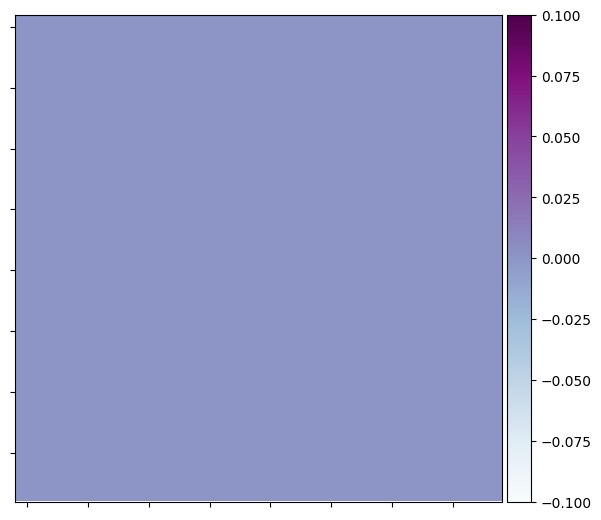

In [ ]:
# create an array of a certain size
example_array = np.zeros((20,20))

from nilearn.plotting import plot_matrix
plot_matrix(example_array, cmap = 'BuPu')

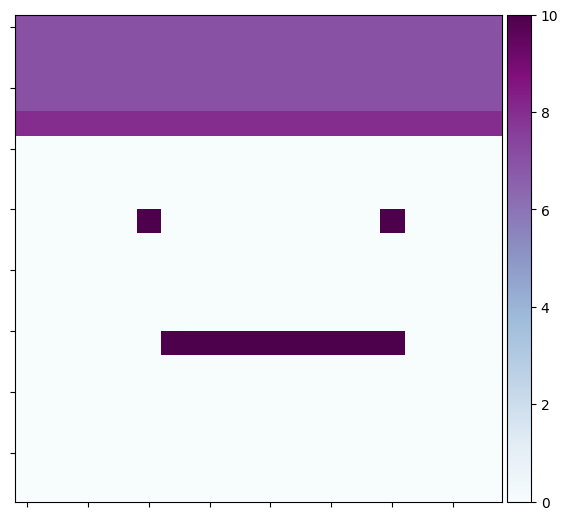

In [ ]:
# access certain values within an array
example_array[8,5] = 10 # here i set the value in the 8th row 5th column to 10
example_array[8,15] = 10 # here i set the value in the 8th row 15th column to 10

# you can also select whole columns or rows
example_array[4,:] = 8 # here i select all values (:) in the 4th row and set it to 7

# with colons : i can specify ranges
example_array[:4,:] = 7 # here i select all between 0th and 3rd row (: = from beginning to value or from value to end) and set it to 5
example_array[13,6:16] = 10 # here i select all values in the 15th row between the 6th and 16th column

# now let's look at the new matrix
plot_matrix(example_array, cmap = 'BuPu')

In [ ]:
# you can show the size of an array like this
print(example_array.shape)

(20, 20)


In [ ]:
# sometimes you also need to know how many different values there are in your matrix
print(np.unique(example_array)) # here we expect the values 0, 5, 7, 10 based on how we defined the array

[ 0.  7.  8. 10.]


### Coding exercise

try to give the matrix a nose!

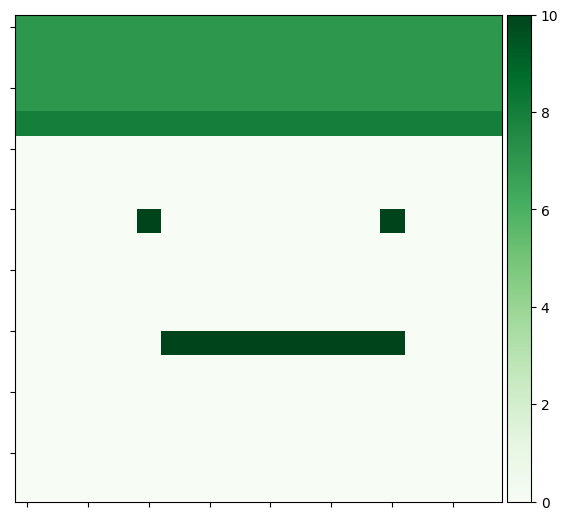

In [ ]:
exercise_array = np.zeros((20,20))

# this is from the previous code
exercise_array[8,5] = 10
exercise_array[8,15] = 10
exercise_array[4,:] = 8
exercise_array[:4,:] = 7
exercise_array[13,6:16] = 10

# add nose here!!



# plot
plot_matrix(exercise_array, cmap = 'Greens')

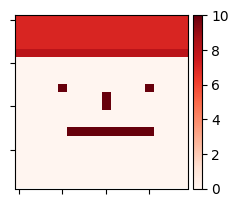

In [ ]:
#@title Solution

exercise_array[9:11,10] = 10

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2,2)) # this is just to show it a little smaller

plot_matrix(exercise_array, cmap = 'Reds', figure = fig)

## General visualization functions

Here, i use brainspace to show you how data visualization works. You can also use other tools such as the ENIGMA toolbox. Pick your poison :)  Here is the official documentation for brainspace https://brainspace.readthedocs.io/en/latest/

In [ ]:
from brainspace.datasets import load_conte69, load_parcellation
from brainspace.plotting import plot_hemispheres

/usr/local/lib/python3.11/dist-packages/brainspace/plotting/base.py:40: UserWarning: Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.
  pn.extension('vtk')


In [ ]:
# this is only required for google colab, not for e.g. VSCodium

!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip install vtk pyvirtualdisplay

# Start virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(800, 200))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display)

In [ ]:
# load surface, here we use conte69 - alternatively, use fsa5
surf_lh, surf_rh = load_conte69()

Conte69 has 64984 surface points. The first 32492 correspond to the left hemisphere, the last 32492 to the right hemisphere. Conte69 is symmetric, FSA5 is not. Let's create nonsense data in this format and project onto the surface

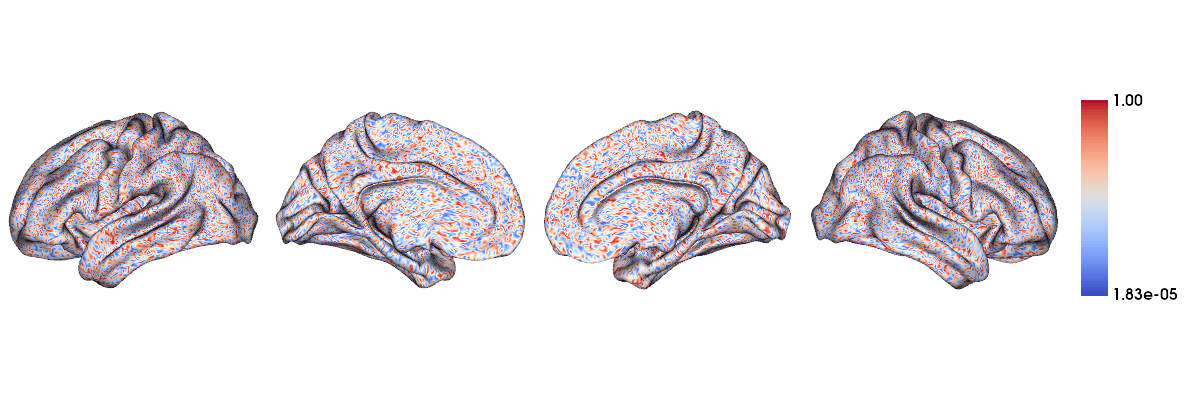

In [ ]:
nonsense_data = np.random.rand(64984)

plot_hemispheres(surf_lh, surf_rh, nonsense_data, # first use the surfaces you want to use and your data
                 embed_nb = True, interactive = False, # this is to make plots work in notebook
                 size = (1200,400), zoom = 1.2, # set size of display
                 color_bar = True, cmap = 'coolwarm') # show color bar and set color map

### Parcellations and midline mask
Sometimes, we want to show all data points on the cortex. But sometimes, it can be very computationally expensive to work with 70k data points. So we can also use parcellations, where cortical regions are grouped into parcels. Let's look at a common parcellation, the Schaefer 400 parcellation

In [ ]:
# we will load a parcellation
s400 = load_parcellation('schaefer', 400, join = True)

In [ ]:
# what does the parcellation look like?
print(np.unique(s400).shape, 'unique values \nshape of s400 is', len(s400))

(401,) unique values 
shape of s400 is 64984


As you can see, we loaded a vector that has as many entries as our surface has vertices. Every entry is a number that corresponds to one of the 400 parcels. Now look at what this parcellation looks like on the cortical surface:

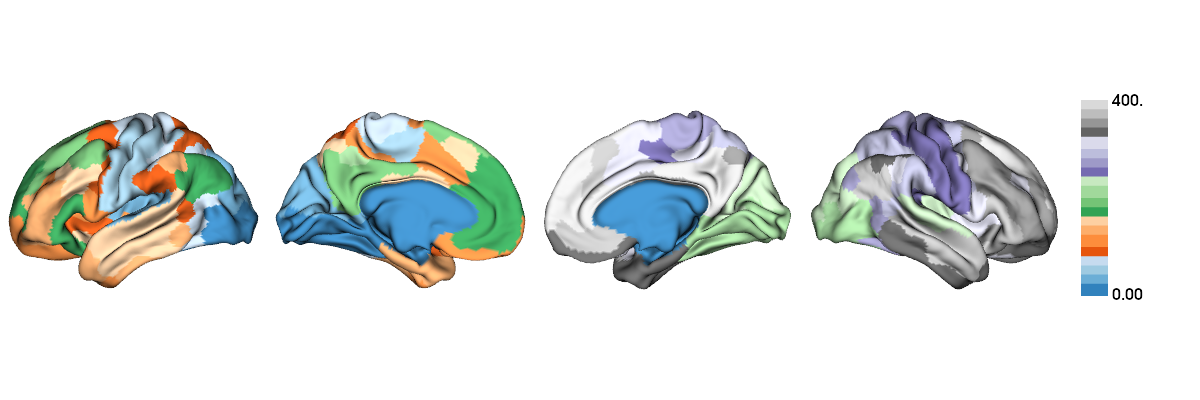

In [ ]:
plot_hemispheres(surf_lh, surf_rh, s400,
                 embed_nb = True, interactive = False,
                 size = (1200,400), zoom = 1.2,
                 color_bar = True, cmap = 'tab20c')

Now, we want to parcellate our data, so we want to summarize all the values in each parcel to one value. Usually, we take the mean. So let's compress our 64984 data points to 400 parcels.

In [ ]:
from brainspace.utils.parcellation import reduce_by_labels
data_400 = reduce_by_labels(nonsense_data, s400)

print(data_400.shape) # there will be one added value as it is 400 parcels (1-400) + 0 for midline

(401,)


Now we want to plot parcellated data. To plot it, we need 64984 data points again. To reproject this to the surface, we use a mapping tool.

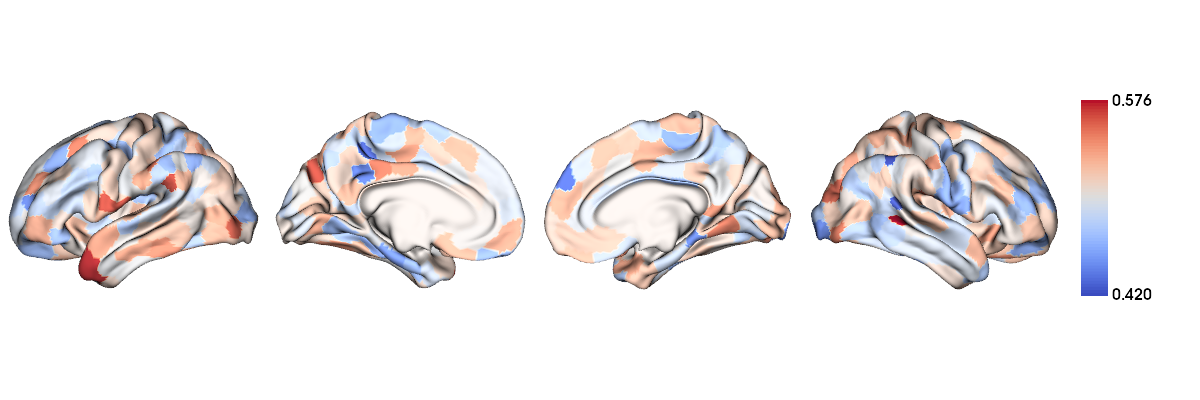

In [ ]:
from brainspace.utils.parcellation import map_to_labels

data_400_mapped_to_surface = map_to_labels(data_400, s400)

plot_hemispheres(surf_lh, surf_rh, data_400_mapped_to_surface,
                 embed_nb = True, interactive = False,
                 size = (1200,400), zoom = 1.2,
                 color_bar = True, cmap = 'coolwarm')

You can see that data is now grouped into parcels.  Also, above in the parcellation you can see that the medial wall (where both hemispheres connect and we do not expect useful data) is parcel number 0. We can use this to 'hide' the medial wall, i.e. replace the values there with nan (non-available) / Even when we use vertex-wise data.

In [ ]:
mask = s400 == 0 # this defines a mask that can be used to select every location where values in s400 are 0

Double `==` means: we compare two values and get an output of `True` or `False`. These are called Booleans. A single `=` means: we define a new variable. I will introduce comparators in the following, then we will return to the mask.

In [ ]:
example_var = 8 # here, single = means we define something
print('Is your variable equal to seven?', example_var == 7) # test ==

# this works similar for !=, >, <
print('Is your variable not equal to seven?', example_var != 7) # test != (is not equal to)
print('Is your variable larger than seven?', example_var > 7) # test > (is larger than)
print('Is your variable smaller than seven?', example_var < 7) # test < (is smaller than)

Is your variable equal to seven? False
Is your variable not equal to seven? True
Is your variable larger than seven? True
Is your variable smaller than seven? False


Now, back to the mask. Here, we applied `==` to a whole vector. Let's look at the output

In [ ]:
mask

array([False, False, False, ..., False, False, False])

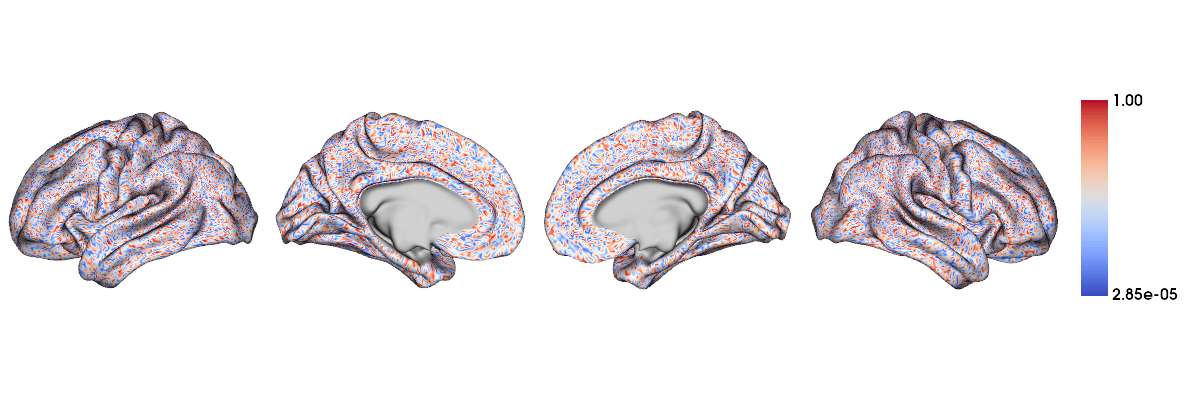

In [ ]:
# Now we can select all values where mask == True from our random numbers vector
nonsense_data[mask] = np.nan # make mask values nan

plot_hemispheres(surf_lh, surf_rh, nonsense_data,
                 embed_nb = True, interactive = False,
                 size = (1200,400), zoom = 1.2,
                 color_bar = True, cmap = 'coolwarm',
                 nan_color = (.7,.7,.7,1)) # set color value for nan values = the selected RGB values here correspond to grey

There is a lot of different parcellations out there. I only intruced Schaefer here as it is a commonly used and maybe most useful one. If you want to use any other parcellation, the same system applies - you just need a vector that specifies the parcels.

### Coding exercises

If you want, you can test your knowledge now.  
Here is an exercise:  
Create an array that can be plotted onto the surface, where all values are 0.  
Then, set all values in the left hemisphere to 1.  

In [ ]:
# code here

your_array = ....

In [ ]:
# plot intermediate outcome here
plot_hemispheres(surf_lh, surf_rh, your_array,
                 embed_nb=True, interactive = False,
                 size = (1200,400), zoom = 1.2,
                 color_bar = True, cmap = 'coolwarm',
                 nan_color = (.7,.7,.7.1))

Good job so far! Second exercise:
We previously used the Schaefer parcellation to create a midline mask - now, i want you to hide all parcels except number 260.

In [ ]:
# code here

your_array_masked = ....

In [ ]:
# plot your array
plot_hemispheres(surf_lh, surf_rh, your_array_masked,
                 embed_nb=True, interactive = False,
                 size = (1200,400), zoom = 1.2,
                 color_bar = True, cmap = 'coolwarm',
                 nan_color = (.7,.7,.7.1))

Good job!  
Below are the solutions. Please try to solve the problems yourself - Coding is all about problem solving, so don't be discouraged and just try it out. The more mistakes you make, the more you learn :)

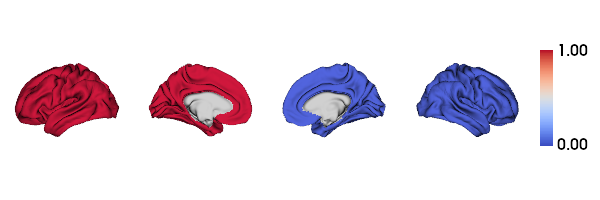

In [ ]:
#@title Solution

# define array
exercise2_data = np.zeros(64984)

# make left hemisphere 1
exercise2_data[:32492] = 1
exercise2_data[mask] = np.nan

# plot intermediate
plot_hemispheres(surf_lh, surf_rh, exercise2_data,
                 embed_nb=True, interactive = False,
                 size = (600,200), zoom = 1,
                 color_bar = True, cmap = 'coolwarm',
                 nan_color = (.7,.7,.7,1))

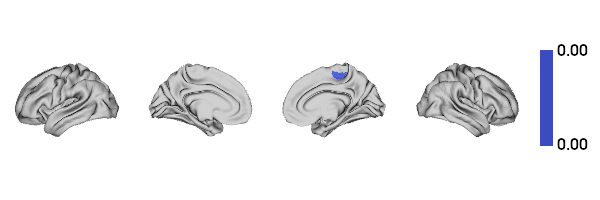

In [ ]:
#@title Solution part 2
# now mask schaefer parcel 260
mask_s20 = s400 != 260

exercise2_data_masked = exercise2_data.copy()

exercise2_data_masked[mask_s20] = np.nan

# plot
plot_hemispheres(surf_lh, surf_rh, exercise2_data_masked,
                 embed_nb=True, interactive = False,
                 size = (600,200), zoom = 1,
                 color_bar = True, cmap = 'coolwarm',
                 nan_color = (.7,.7,.7,1))

## HPC connectivity data

Here, we use functional connectivity data from the human connectome project (HCP), available via brainspace. See how to load individual data below.

In [ ]:
from brainspace.datasets import load_group_fc

fc_matrix = load_group_fc(parcellation = 'schaefer', scale = 400) # this is already preprocessed and everything. Usually we need to do this before, but here you don"t have to worry about ir for once

This gives us a 400 x 400 matrix. Let's visualize this real quick.

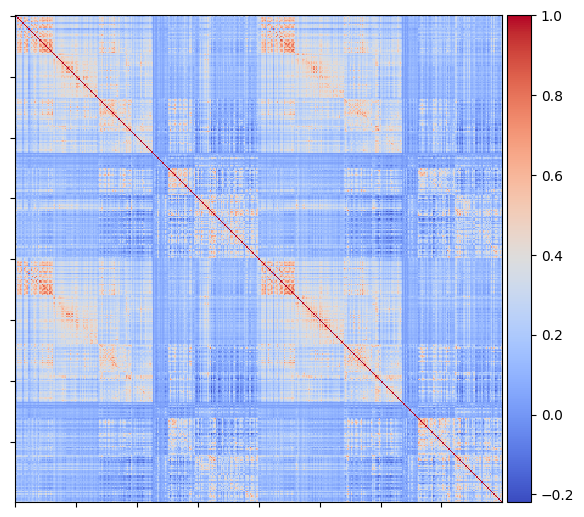

In [ ]:
from nilearn.plotting import plot_matrix

plot_matrix(fc_matrix, cmap = 'coolwarm')

Now, if we want to plot it onto the surface, we need a 64984, vector again. We already know how to bring parcellated data in 400, shape to a 64984, shape, (see `map_to_labels()` above). But now, we have a 400,400 (two-dimensional) data - so first, we need to bring it into one dimension. We can do this for example by creating the average, using `np.mean`. If you use `np.mean`, it gives you the overall average (so just one number), but you can specify `axis` so it creates the row-wise or column-wise average.

In [ ]:
# this is what happens if we just use np.mean

print(np.mean(fc_matrix)) # we expect only one value but we need the mean for each row/column

0.2088529968891225


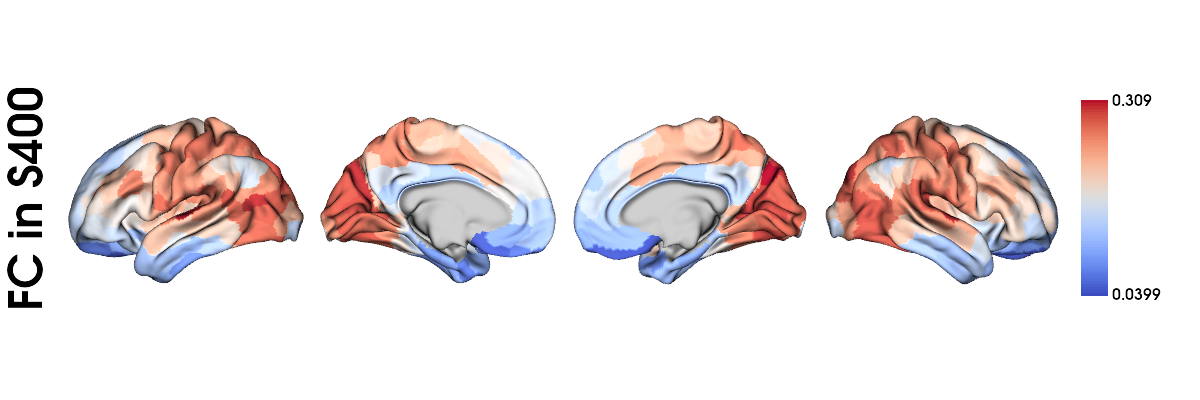

In [ ]:
# now create row wise average
avg_fc_s400 = np.mean(fc_matrix, axis = 0)
# add one entry at beginning for midline
avg_fc_s400 = np.insert(avg_fc_s400, 0, 0)

# and map to labels
avg_fc = map_to_labels(avg_fc_s400, s400)

# apply midline mask
avg_fc[mask] = np.nan

# then plot
plot_hemispheres(surf_lh, surf_rh, avg_fc,
                 embed_nb = True, interactive = False,
                 size = (1200,400), zoom = 1.2,
                 color_bar = True, cmap = 'coolwarm',
                 label_text = ['FC in S400'],
                 nan_color = (.7,.7,.7,1))

## Gradients

We just projected data onto the surface. First, we reduced its dimensionality to one dimension, then we were able to plot it.   Another way to reduce the dimensionality of data and find trajectories of organization is gradient decomposition.

https://brainspace.readthedocs.io/en/latest/python_doc/auto_examples/plot_tutorial1.html#sphx-glr-python-doc-auto-examples-plot-tutorial1-py

## Load individual neuroimaging data

Depending on the data at hand, you will most likely have a nifti, gifti or cifti file. (E.g. ending in .`func.gii`). Unfortunately I cannot provide a walk through for this (I can't/don't want to upload actual data to an open notebook), but you can use the following command to load data.

In [ ]:
# for data files
lh_map = nib.load('/path/sub-001_ses-01_hemi-L_surf-fslr32k_label_thickness.func.gii').agg_data() # obviously adapt path and subject/session
rh_map = nib.load('/path/sub-001_ses-01_hemi-R_surf-fslr32k_label_thickness.func.gii').agg_data()

# if agg_data() doesn't work, sometimes get_fdata() works depending on the filetype in question

ct_map = np.concatenate((lh_map, rh_map))

In [ ]:
# for surface files (you will need this less often) # extract points and faces
points_l, faces_l = nib.load('/path/sub-001_ses-01_hemi-L_space-nativepro_surf-fsLR-32k_label-midthickness.surf.gii').agg_data()
points_r, faces_r = nib.load('/path/sub-001_ses-01_hemi-R_space-nativepro_surf-fsLR-32k_label-midthickness.surf.gii').agg_data()

# reconstruct surface
from brainspace.mesh.mesh_creation import build_polydata

surf_l_ind = build_polydata(points_l, faces_l)
surf_r_ind = build_polydata(points_r, faces_r)

# now you can use native surfaces just by typing them into the plot_hemispheres function --> plot_hemispheres(surf_l_ind, surf_r_ind, data ...)